# Predicting Airline Customer Satisfaction 

## Introduction
   
For this project, I worked as a consultant for an airline. The airline was interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They requested me to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience, using inflight entertainment and other independent variables within the dataset.

The data for this activity has a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others.My goal was to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, there was need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, I demonstrated the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model and Naive bayes model
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [72]:
%matplotlib inline
### YOUR CODE HERE ###

# Standard operational package imports.
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# for ease of data profiling
from pandas_profiling import ProfileReport

# To display the entire columns in the dataset, we run the code below
pd.set_option('display.max_columns', None)

### Load the dataset

In [2]:
# load the dataset for our analysis

df = pd.read_csv('C:/Users/mena/Desktop/Invistico_Airline.csv')

### Preview dataset

Preview the dataset by outputing the first 10 rows of data.

In [3]:
# Display the first 10 rows of our dataset

df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [4]:
#use pandas-profiling to do quick first pass at EDA
profile = ProfileReport(df, title="Airline_Customer_Satisfaction_Report")
# create html file to view report
profile.to_file("C:/Users/mena/Desktop/Investico_Airline/airline_customer_satisfaciton_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [5]:
# Preview the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
# Preview the colums

df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
# Chesk the shape of the dataset

df.shape

(129880, 22)

In [8]:
# Check the descriptive statistics of the dataset

df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Continue Exploration

Because our clients have requested that we evaluate first, how inflight entertainment affects customer satisfaction, we will be building a model to first evaluate the impact of inflight entertainment on customer satisfaction, after which we will build a model to predict customer satisfaction from the predictor variables.

Before we proceed, we will review our profile report, then we;
1. Check for missing values
2. Check for dplicates
3. Check for data balance in the dependent variable class

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [9]:
# Check for missing values

df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
# Remove columns with missing values

df = df.dropna().reset_index(drop = True)

In [11]:
df.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [12]:
# check for duplicates in the data
df.duplicated().sum()

0

There are no duplicates in the data

In [13]:
df.shape

(129487, 22)

In [14]:
### YOUR CODE HERE ###
df['satisfaction'].value_counts()


satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

There were  70882 satisfied customers, about 54.7%, so our data is almost balanced and there will be no need for rebalancing through techniques such upsampling or downsampling

### Prepare the data

Since we will  want to create a plot (`sns.regplot`) of our model to visualize results later in the notebook, the independent variable `Inflight entertainment` can be "of type int" but the dependent variable `satisfaction` cannot be "of type object." 

Make the `satisfaction` column "of type numerical." 
We will also encode other categorical variables such as; 
Customer type, Type of travel and Class

In [15]:
# First we visualize the data type of all the columns

df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [16]:
df1 = df.copy()

In [17]:
# to encode the categorical columns with hierarchy, we use the categolrical emcoding which is similar to the mapping method 
# but while mapping offers simplicity, categorical encoding offers flexibility in handling categorical data 
# and reordering variable categories, both of these methods are preferred to onehot encoding for data that has an inherent order as in the case of salary
# OneHot encoding assumes independence among the various groups and encodes them as independent variables

# Asuming we are encoding a single column, lets say the Customer Type column, the code would be;

#df1['Customer Type'] = (
   # df1['Customer Type'].astype('category')
   # .cat.set_categories([Loyal, Disloya])
    #.cat.codes
#)
# But since we want to encode multiple columns at once, we use the apply method

df1[['Customer Type', 'Type of Travel', 'Class']] = (
    df1[['Customer Type', 'Type of Travel', 'Class']]
    .apply(lambda x: x.astype('category').cat.codes)
)

In [18]:
#Encode the satisfaction column
# Note; we can also use mapping to achieve same results here, as shown below this code.

# One-hot encode the 'Satisfaction' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_satisfaction = encoder.fit_transform(df1[['satisfaction']])

# Since OneHotEncoder drops the first category (assuming 'not satisfied'), 
# the resulting column will be 1 for 'satisfied' and 0 for 'not satisfied'
df1['satisfaction'] = encoded_satisfaction

#df1['satisfaction'] = df1['satisfaction'].map({'satisfied': 1, 'unsatisfied': 0})


In [19]:
# Preview our engineered dataset

df1.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,1.0,0,30,1,1,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,1.0,0,66,1,1,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,1.0,0,10,1,1,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,1.0,0,56,1,0,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,1.0,0,22,1,1,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


### Prepare to build model

Since our client wants to understand the impact of inflight entertainment on customer satisfaction as well as a model that will predict satisfaction considering other variables within the dataset.

We will begin by building and evaluating a predictive model for satisfaction using only inflight enternament, then subsequently we will add other variables and see how it affects our model

### Create X and y variables and training and testing data

First we isolate the dependent and independent variables for our model and then we go ahhead and split the data into
training and testing datasets using a 70/30 split and assigning a random state for reproducibility
X


In [20]:
# Isolate dependent and independent variables
X = df1[["Inflight entertainment"]]
y = df1["satisfaction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [21]:
# Instantiate a Logistic Regression model

clf = LogisticRegression().fit(X_train,y_train)

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [22]:
# Find the coefficient of our model
clf.coef_

array([[0.99751462]])

### Understanding the coefficient 

The logistic regression model estimates the log-odds of the dependent variable (satisfaction) being 1 (satisfied) versus 0 (not satisfied) as a linear combination of the independent variables.

The logistic regression equation is:
log(p/1-p) = B0 + B1X
Where;
p is the probability of y=1(satisfied)
Bo = interept
B1 = coefficeint for the independent variable X (inflight entertainment)

The coefficient (0.99751462 in this case) represents the change in the log-odds of being satisfied for a one-unit increase in Inflight_entertainment.
To interpret this in terms of odds/likelihood we need to exponentiate this value to get the odds/likelihood(Done in the next cell).
The odds ratio tells us how the odds of being satisfied change with a one-unit increase in Inflight_entertainment
An odds ratio of 1 means no change in odds.
An odds ratio greater than 1 means the odds increase.
An odds ratio less than 1 means the odds decrease.
In this case, the odds ratio (Exponentiated Coefficient) is approximately 2.711. This means that for each one-unit increase in Inflight_entertainment, the odds of a passenger being satisfied are 2.711 times higher or about 171% increase in the odds of being satisfied, holding all other variables constant.

This suggests a strong positive relationship between Inflight_entertainment and passenger satisfaction. As the quality or availability of Inflight_entertainment increases, passengers are significantly more likely to be satisfied

In [23]:
beta_1 = 0.99751462
odds_ratio = np.exp(beta_1)
odds_ratio

2.711534253785179

In [24]:
# Find the intercept
clf.intercept_

array([-3.19355406])

### Understanding the intercept

Now the intercept represents the odds/likelihood of the target event(satisfaction) occuring when the independent variable (Inflight_entertainment) is 0 or absent.

The intercept of our model was -3.19355406, to find the odds_ration we exponentiate this.
The odds_ratio here was 0.04, about 4%, this means that in the adsence of inflight entertainment or when it is rated low, the likelihood of customers being satisffied is very low, about 4%

In [25]:
beta_0 = -3.19355406
odds_ratio_intercept = np.exp(beta_0)
odds_ratio_intercept

0.041025803359661106

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction'>

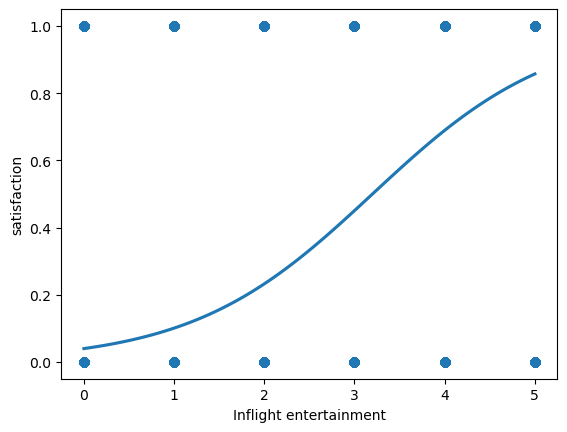

In [26]:
### YOUR CODE HERE ###
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df1, logistic=True, ci=None)

The logistis regression plot above demonstrates a sigmoid curve, characteristic of logistic regression.
The plot represents a monotonic relationship between satisfaction and inflight entertainment, as inflight entertainment rating increased so did the probability of satisfaction.

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Next we predict the satisfaction y given inflight enterteinment ratings in the holdout dataset X_test and asign the result to a variable of our choice, her y_pred

In [27]:
# Predict satisfaction and Save predictions in a variable
y_pred = clf.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [28]:
### YOUR CODE HERE ###
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


### Reviewing predictioin results

Now, the code above previews only the first and last three predictions, one could want to view other segments of the data. This can be achieved by any of the following methods depending on the need;

1. You can convert the predictions to a list and print the entire list. This is useful for relatively small arrays, code: Assuming y_pred is your predictions array
print(list(y_pred))

2. You can use slicing to print a specific range of predictions. For example, to print the first 10 predictions, code:Print the first 10 predictions:
print(y_pred[:10])

Print a specific range, e.g., predictions from index 5 to 15
print(y_pred[5:15])

3. You can loop through the predictions and print each one. This method is useful if you want to format the output. code:Loop through and print each prediction
for i, pred in enumerate(y_pred):
    print(f"Prediction {i}: {pred}")

### Use the `predict_proba` and `predict` functions on `X_test`
With this we could get the probalility of each prediction and this is particularly important as it could tell us the strength of each prediction or its liklihood of being right or how sure the system is about each prediction.

In [29]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
probability_score = clf.predict_proba(X_test)

### Review predictions and their probability scores

In [30]:
print('First 5 predictions:',y_pred[:5])
print('Probability score for first 5 predictions;', probability_score[:5])

First 5 predictions: [1. 0. 0. 1. 1.]
Probability score for first 5 predictions; [[0.14258068 0.85741932]
 [0.55008402 0.44991598]
 [0.89989329 0.10010671]
 [0.31077375 0.68922625]
 [0.31077375 0.68922625]]


### Understanding our predictions

Its important to note that predictions are made using the probability of events occuring giving other events, and it ranges from 0(will not happen) to 1(will happen). values from zero to less than 0.5 are classed as negative ( in the case of our study, not satisfied) while those 0.5 and above are classified as positive (satisfied).

In our prediction results, the 1s means satisfied while the 0s are not satisfied
Using the probabilities we can see how strong each prediction is for instance, considering the first predition with probability vallues [0.14258068 0.85741932], this means that the probability of not being satisfied is about 0.1425 while the probability of being satisfied is about 0.8574 which means the system will predict the customer to be satisfied, this quite a strong prediction as it has a high probability score.
Agian lets consider another example, in our second prediction, the customer was predicted to be not satisfied with probability values;[0.55008402 0.44991598], from this result, the probability of satisfaction not occuring was 0.5500 while the probability of satisfaction occuring was 0.4499. While this customer will be predicted as not satisfied, we can see that the probability score here is week being barely above 0.5.

In esence its important to understand how sure our system prediction is for eache prediction, we can say that for our first two predictions, our system is about 86% sure that the first customer will be satisfied, while it about 55% sure that the second customer will not be satisfied, having this knowledge can help inform our decision of possible interventions.

### Analyze the results

Print out the model's accuracy, precision, recall, F1, and roc score.

In [31]:
# We can then print out the matrics of our model

print("Accuracy:", "%.6f" %metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" %metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" %metrics.recall_score(y_test, y_pred))
print("F1_Score:", "%.6f" %metrics.f1_score(y_test, y_pred))
print("ROC_AUC:", "%.6f"%metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1_Score: 0.818827
ROC_AUC: 0.799506


### Making sense of the metrics

Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances: The accuracy score of our model was about 80.15%, this means that 80.15% of our models predictions(both positives and negatives, i.e satisfied and not satisfied) were corect. This is good value and indicates good general performance of our model.

Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives): This menas that 81.61% of the instances predicted as "satisfied" are actually "satisfied". This indicates that the model did well with predicitng true positves and is good at minimizing false positives.

Recall is the ratio of true positive predictions to the total number of actual positives (true positives + false negatives)
from our models recall score, 82.15% of the actual "satisfied" instances are correctly identified by the model. This suggests that the model is effective at identifying most of the satisfied customers and minimizing false negatives.

F1 Score is the harmonic mean that tries to balance precision and recall, our models score was 81.18%, which means our model was good with identifying true positives and negatives and also good at minimizing false positives and false negatives

ROC AUC is the area under the Receiver Operating Characteristic curve, representing the model's ability to distinguish between classes. The ROC_AUC score of 0.7995 means the model has a good ability to differentiate between satisfied and not satisfied customers. A value close to 1 indicates a high level of separability, while 0.5 indicates no better than random guessing.

### Produce a confusion matrix

To ascertain the kind of errors made by our model we produce a confusion matrix diagram

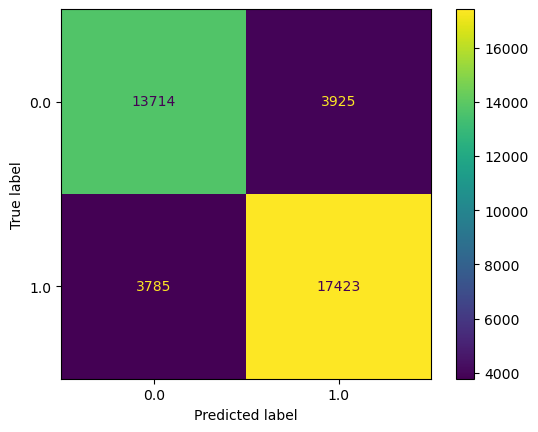

In [32]:
# Display a confusion matrix diagram

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()


**Findings from our confusion matrix diagram:** 
From our diagram of the total test set, our model had a true positve prediction of 17423 and true negative prediction of 13714
The value of the false positve prediction was 3925 while the false neagtive prediction was 3785

From our diagram, our model did well with identifying a significant amount of the customers who were satisfied and not satisfied.

The number of customers that were wrongly classified were not also too high, it made slightly more type 1 errors than type 2 errors.

## Considerations

**Findings from our analysis**
1. Our model did well over all in predicting outcomes from the text set.

2. From our analysis, the odds ratio (Exponentiated Coefficient) is approximately 2.711. This means that for each one-unit increase in Inflight_entertainment, the odds of a passenger being satisfied are 2.711 times higher or a 171% increase in the odds of being satisfied, holding all other variables constant. This suggests a strong positive relationship between Inflight_entertainment and passenger satisfaction. Thus, as the quality or availability of Inflight_entertainment increases, passengers are significantly more likely to be satisfied

3. With an intercept of -3.19355406, and an odds_ratio ofs 0.04, the absence of inflight entertainment or it's low rating, will also translate to a low likelihood of customers being satisffied with chance of being satisfied in this insance being 4%

4. Our model's errors, both type 1 and 2 were similar and not too high

**Our recommendations to stakeholders would be to:**
1. Not compromise on inflight entertainment
2. Consider constantly improving content variety and quality; This may involve, frequent update, offering content in multiple languages, expanding content library and providing varying video and audio quality.
3. Ensure the systems are interactive and can be personalized
4. Ensure easy connectivity and accessibility
5. Get customer feedbacks and implement them


### Next we will:
1. Build a logistic regression model by adding other independent variaboes in our dataset
2. Build a naive bayes model to compare or results from the logistic regression model

In [33]:
# First we copy our data into a new variable

df2 = df1.copy()

In [34]:
# preview our new dataset

df2.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,1.0,0,30,1,1,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,1.0,0,66,1,1,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,1.0,0,10,1,1,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,1.0,0,56,1,0,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,1.0,0,22,1,1,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


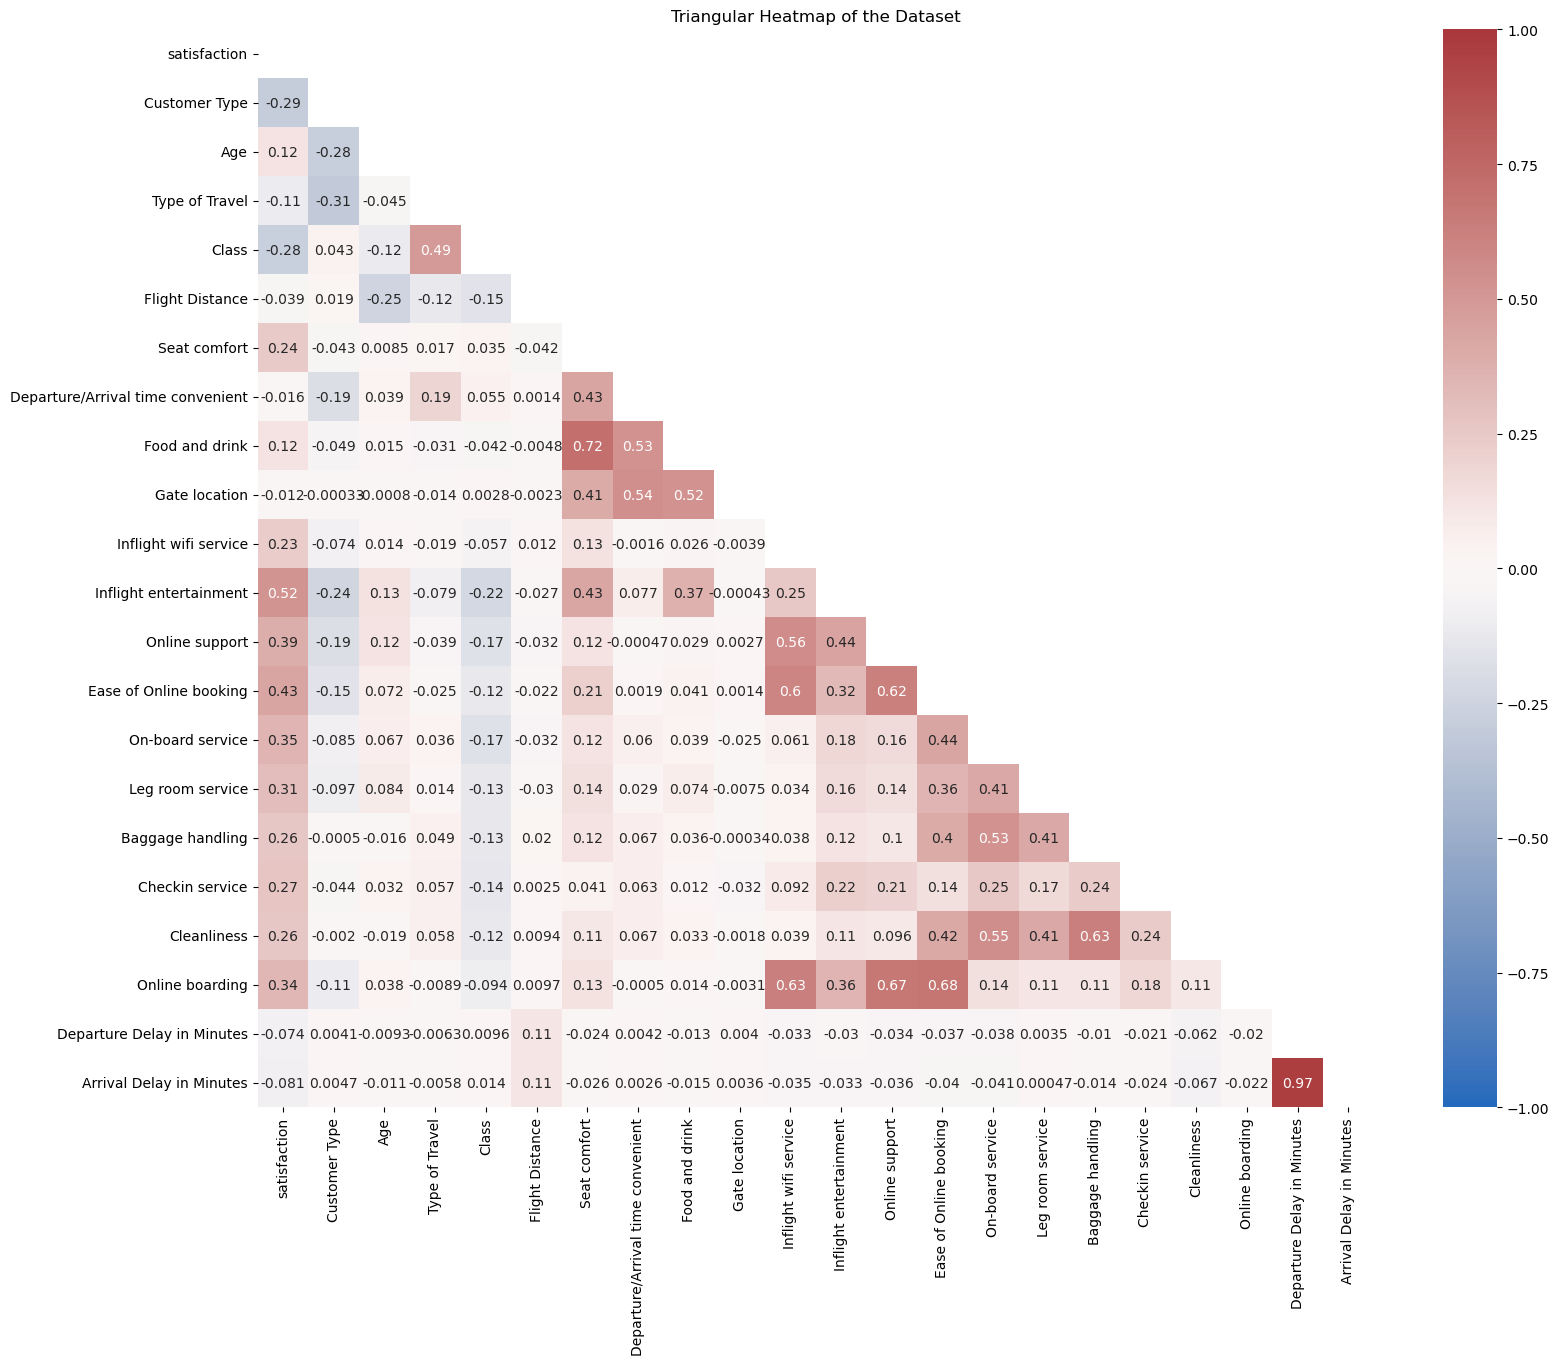

In [49]:
# First we plot a correlation heatmap, to identify highly correlated variables.

# Plot correlation heat map, to rule out multicolinearity among the predictor variables

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask
plt.figure(figsize=(18, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1, center=0)

plt.title('Triangular Heatmap of the Dataset')
plt.show()

In [50]:
# create a dataframe for highly correlated columns

def correlation(df2, threshold):
    correlated_cols = set()
    corr_mat = df2.corr()
    
    # Iterate over the upper triangle of the correlation matrix
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold:
                col = corr_mat.columns[i]
                correlated_cols.add(col)
    
    return correlated_cols

threshold = 0.6
highly_correlated_cols = correlation(df2, threshold)
print(highly_correlated_cols)

{'Cleanliness', 'Online boarding', 'Food and drink', 'Ease of Online booking', 'Arrival Delay in Minutes'}


In [51]:
# Drop highly correlated features

df2.drop(labels=highly_correlated_cols,axis=1,inplace=True)
df2.shape

(129487, 17)

In [52]:
# Visualize the first few rows of our dataset
df2.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Departure Delay in Minutes
0,1.0,0,65,1,1,265,0,0,2,2,4,2,3,0,3,5,0
1,1.0,0,47,1,0,2464,0,0,3,0,2,2,4,4,4,2,310
2,1.0,0,15,1,1,2138,0,0,3,2,0,2,3,3,4,4,0
3,1.0,0,60,1,1,623,0,0,3,3,4,3,1,0,1,4,0
4,1.0,0,70,1,1,354,0,0,3,4,3,4,2,0,2,4,0


### Scalling

Some of the features appear to be in scales that are significantly higher than other and this may affect our models if not corrected.
So we will identify such columns and scale their values as necessary.

In [55]:
# Identify columns with significantly higher scales

df_scaled=[]
for i in df2.columns:
  a=len(list(df2[i].unique()))
  if a>10:
    df_scaled.append(i)
print(df_scaled)

['Age', 'Flight Distance', 'Departure Delay in Minutes']


In [59]:
scale_threshold = 10  # Example threshold

# Initialize an empty list to store column names
df_high_scale = []

# Iterate over each column in the DataFrame
for col in df2.columns:
    col_range = df2[col].max() - df2[col].min()  # Compute the range of the column
    if col_range > scale_threshold:  # Check if the range exceeds the threshold
        df_high_scale.append(col)  # Append the column name to the list

# Print the list of column names with significantly higher scales
print(df_high_scale)

['Age', 'Flight Distance', 'Departure Delay in Minutes']


C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


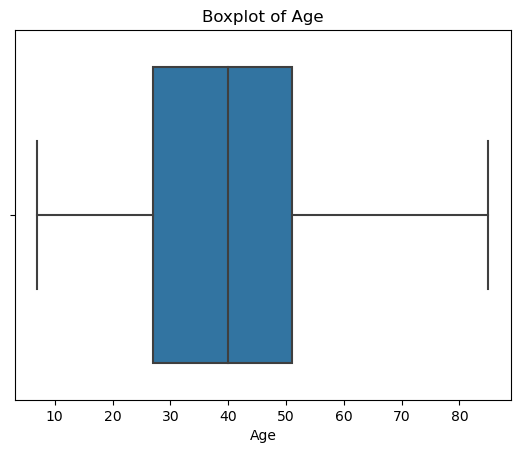

C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


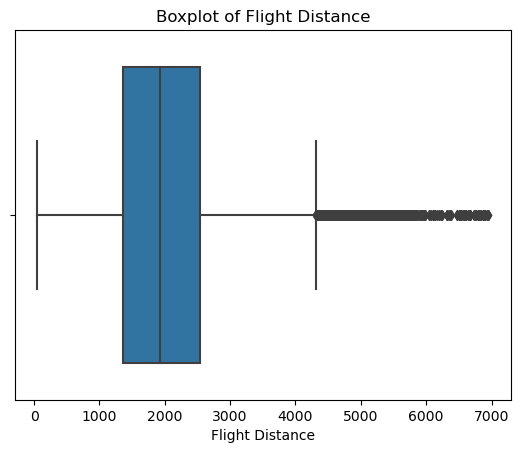

C:\Users\mena\anaconda3\envs\ml_regression\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


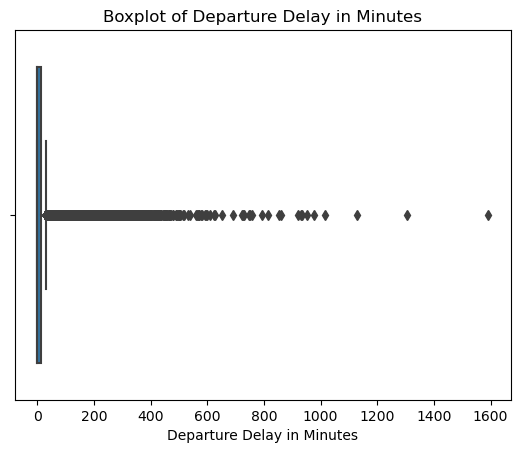

In [57]:
# plot a box plot of the variables that need scaling 
for i in df_scaled:
  sns.boxplot(df2[i])
  plt.title(f'Boxplot of {i}')
  plt.show()
  print()

### Prepare for scaling

In [62]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(1,5))

In [63]:
df2[df_high_scale]=scalar.fit_transform(df2[df_high_scale])

In [64]:
df2.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Departure Delay in Minutes
0,1.0,0,3.974359,1,1,1.124620,0,0,2,2,4,2,3,0,3,5,1.000000
1,1.0,0,3.051282,1,0,2.399218,0,0,3,0,2,2,4,4,4,2,1.778894
2,1.0,0,1.410256,1,1,2.210259,0,0,3,2,0,2,3,3,4,4,1.000000
3,1.0,0,3.717949,1,1,1.332126,0,0,3,3,4,3,1,0,1,4,1.000000
4,1.0,0,4.230769,1,1,1.176206,0,0,3,4,3,4,2,0,2,4,1.000000
5,1.0,0,2.179487,1,1,2.068831,0,0,3,2,0,2,5,4,5,5,1.000000
6,1.0,0,4.025641,1,1,1.102594,0,0,3,2,5,5,5,0,5,5,1.042714
7,1.0,0,1.153846,1,1,2.021301,0,0,3,2,0,2,3,3,4,5,1.000000
8,1.0,0,3.512821,1,0,1.013331,0,0,3,5,3,5,4,0,1,5,1.000000
9,1.0,0,1.769231,1,1,1.872917,0,0,3,2,0,2,2,4,5,3,1.075377


### Next we prepare to build a new logistic regression model with all the features in our dataset.

In [85]:
#  Isolate dependent and independent variables

y = df2["satisfaction"]
X = df2.drop("satisfaction", axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [88]:
# Instantiate a logistic regression

clf = LogisticRegression(random_state = 42, max_iter = 500)

In [89]:
# Fit the logistis regression model to our training set

clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [90]:
# prediction customer satisfaction using our model

y_pred_all = clf.predict(X_test)

In [94]:
# Print out a detailed report of our model's metrics

#targeted_names = ('Not satisfied', 'Satisfied')
#print(classification_report(y_test, y_pred, target_names = targeted_names))

In [92]:
print("Accuracy:", "%.6f" %metrics.accuracy_score(y_test, y_pred_all))
print("Precision:", "%.6f" %metrics.precision_score(y_test, y_pred_all))
print("Recall:", "%.6f" %metrics.recall_score(y_test, y_pred_all))
print("F1_Score:", "%.6f" %metrics.f1_score(y_test, y_pred_all))
print("ROC_AUC:", "%.6f"%metrics.roc_auc_score(y_test, y_pred_all))

Accuracy: 0.824002
Precision: 0.835755
Recall: 0.843361
F1_Score: 0.839541
ROC_AUC: 0.822043


Single feature (inflight entertainment) model
Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1_Score: 0.818827
ROC_AUC: 0.799506

### Build a Naive Bayes Model

Next we build a Naive Baye model to compare our results

In [95]:
from sklearn import naive_bayes
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

y_pred_nb = nb.predict(X_test)

In [96]:
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred_nb))

# Print your precision score.

### YOUR CODE HERE ###

print('precision score:'), print(metrics.precision_score(y_test, y_pred_nb))

# Print your recall score.

### YOUR CODE HERE ###

print('recall score:'), print(metrics.recall_score(y_test, y_pred_nb))

# Print your f1 score.

### YOUR CODE HERE ###

print('f1 score:'), print(metrics.f1_score(y_test, y_pred_nb))

accuracy score:
0.8221226864365331
precision score:
0.8373761208117037
recall score:
0.8366654092795172
f1 score:
0.8370206141799141


(None, None)

## Final Summary

Overall, the three models performed well with the multi parameter logistic regression being the best with slightly better metrics than the single parameter logistic regression model and naive bayes model.